In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

In [ ]:
kaggle_path = '/content/drive/MyDrive/멀티캠퍼스/data/kaggle.json'

In [ ]:
! mkdir -p ~/.kaggle
! cp '{kaggle_path}' ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
%cd '/content/drive/MyDrive/멀티캠퍼스/data'

! kaggle competitions download -c dogs-vs-cats

/content/drive/MyDrive/멀티캠퍼스/data
sampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.zip: Skipping, found more recently modified local copy (use --force to force download)
test1.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
train_path = '/content/drive/MyDrive/멀티캠퍼스/data/train.zip'
test_path = '/content/drive/MyDrive/멀티캠퍼스/data/test1.zip'

! unzip '{train_path}'
! unzip '{test_path}'

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           
  inflating: t

# 소규모 데이터로 확인하기
- 데이터 셋이 적은 경우에 사용할 수 있는 몇 가지 방법
  - 데이터 증식
  - 전이 학습

In [ ]:
import os, shutil

In [ ]:
# 원본 데이터셋의 경로
original_dataset_path = '/content/drive/MyDrive/멀티캠퍼스/data/train'

# 소규모 데이터를 위한 폴더
base_dir = '/content/drive/MyDrive/멀티캠퍼스/data/cat_and_dog_small/'
# 해당 셀을 반복적으로 실행을 하면 에러가 발생(방지)
# 기존에 해당 폴더가 이미 존재하면 삭제후 새로 생성
if os.path.exists(base_dir):
  shutil.rmtree(base_dir) # 기존에 폴더가 존재할 경우 삭제
os.mkdir(base_dir)

# 훈련셋, 검증셋, 테스트셋을 미리 분할하기 위한 폴더 경로
train_path = os.path.join(base_dir, 'train')
val_path = os.path.join(base_dir, 'validation')
test_path = os.path.join(base_dir, 'test')

# 해당 경로에 폴더를 생성
os.mkdir(train_path)
os.mkdir(val_path)
os.mkdir(test_path)

# 훈련용 고양이 사진을 위한 폴더
train_cat_path = os.path.join(train_path, 'cats')
os.mkdir( train_cat_path)

# 훈련용 강아지 사진을 위한 폴더
train_dog_path = os.path.join(train_path, 'dogs')
os.mkdir( train_dog_path)

# 검증용 고양이 사진을 위한 폴더
val_cat_path = os.path.join(val_path, 'cats')
os.mkdir( val_cat_path)

# 검증용 강아지 사진을 위한 폴더
val_dog_path = os.path.join(val_path, 'dogs')
os.mkdir( val_dog_path)

# 테스트용 고양이 사진을 위한 폴더
test_cat_path = os.path.join(test_path, 'cats')
os.mkdir( test_cat_path)

# 테스트용 강아지 사진을 위한 폴더
test_dog_path = os.path.join(test_path, 'dogs')
os.mkdir( test_dog_path)

In [ ]:
# 책에서는 전체 이미지에서 10%에 해당하는 1000개의 이미지를 훈련용으로 사용
# 검증용과, 테스트용은 각각 500개씩 사용

# 학습용 이미지 복사
fnames = [f'cat.{i}.jpg' for i in range(1000)]
for fname in fnames:
  src_path = os.path.join(original_dataset_path, fname) # 원본 파일 경로
  dst_path = os.path.join(train_cat_path, fname)        # 복사할 파일 경로
  shutil.copyfile( src_path, dst_path )

fnames = [f'dog.{i}.jpg' for i in range(1000)]
for fname in fnames:
  src_path = os.path.join(original_dataset_path, fname) 
  dst_path = os.path.join(train_dog_path, fname)        
  shutil.copyfile( src_path, dst_path )

# 검증용 이미지 복사
fnames = [f'cat.{i}.jpg' for i in range(1000, 1500)]
for fname in fnames:
  src_path = os.path.join(original_dataset_path, fname) 
  dst_path = os.path.join(val_cat_path, fname)        
  shutil.copyfile( src_path, dst_path )

fnames = [f'dog.{i}.jpg' for i in range(1000, 1500)]
for fname in fnames:
  src_path = os.path.join(original_dataset_path, fname) 
  dst_path = os.path.join(val_dog_path, fname)        
  shutil.copyfile( src_path, dst_path )

# 테스트용 이미지 복사
fnames = [f'cat.{i}.jpg' for i in range(1500, 2000)]
for fname in fnames:
  src_path = os.path.join(original_dataset_path, fname) 
  dst_path = os.path.join(test_cat_path, fname)        
  shutil.copyfile( src_path, dst_path )

fnames = [f'dog.{i}.jpg' for i in range(1500, 2000)]
for fname in fnames:
  src_path = os.path.join(original_dataset_path, fname) 
  dst_path = os.path.join(test_dog_path, fname)        
  shutil.copyfile( src_path, dst_path )

## 데이터 전처리
1. 모든 이미지가 동일한 크기를 가져야만 합니다.
  - 이미지의 크기가 다르면 입력 차원의 크기가 달라지기 때문에
  - 학습을 할 수가 없습니다.

2. 스케일링
  - 픽셀값을 0 ~ 255 사이의 값으로 스케일링

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# 데이터의 경로
base_dir = '/content/drive/MyDrive/멀티캠퍼스/data/cat_and_dog_small/'
train_path = os.path.join(base_dir, 'train')
val_path = os.path.join(base_dir, 'validation')
test_path = os.path.join(base_dir, 'test')

# 모든 이미지의 픽셀값을 스케일링
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
  train_path,
  target_size = (150, 150), # 150 x 150의 크기로 변환
  batch_size = 20,
  class_mode = 'binary'
)

val_generator = test_datagen.flow_from_directory(
  val_path,
  target_size = (150, 150), # 150 x 150의 크기로 변환
  batch_size = 20,
  class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## 네트워크 구성하기

In [ ]:
model = tf.keras.models.Sequential()

# Convolution Layer
model.add( tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add( tf.keras.layers.MaxPool2D((2,2)))

model.add( tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add( tf.keras.layers.MaxPool2D((2,2)))

model.add( tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add( tf.keras.layers.MaxPool2D((2,2)))

model.add( tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add( tf.keras.layers.MaxPool2D((2,2)))

# feature map -> input
model.add( tf.keras.layers.Flatten() )

# Neural Network
model.add( tf.keras.layers.Dense(512, activation='relu') ) # hidden layer
model.add( tf.keras.layers.Dense(1, activation='sigmoid') )# output layer

# optimaze
model.compile(
  loss = 'binary_crossentropy',
  metrics = ['acc'],
  optimizer = tf.keras.optimizers.RMSprop(lr=0.0001)
)

## 학습

In [ ]:
hist = model.fit_generator(
  train_generator,
  steps_per_epoch = 100,
  epochs = 30,
  validation_data = val_generator,
  validation_steps= 50
)

Epoch 1/30
100/100 [==============================] - 19s 178ms/step - loss: 0.6871 - acc: 0.5490 - val_loss: 0.6788 - val_acc: 0.5010
Epoch 2/30
100/100 [==============================] - 18s 177ms/step - loss: 0.6637 - acc: 0.5880 - val_loss: 0.6371 - val_acc: 0.6490
Epoch 3/30
100/100 [==============================] - 18s 176ms/step - loss: 0.6197 - acc: 0.6505 - val_loss: 0.6102 - val_acc: 0.6620
Epoch 4/30
100/100 [==============================] - 18s 177ms/step - loss: 0.5819 - acc: 0.6885 - val_loss: 0.6336 - val_acc: 0.6300
Epoch 5/30
100/100 [==============================] - 18s 176ms/step - loss: 0.5484 - acc: 0.7270 - val_loss: 0.5821 - val_acc: 0.6960
Epoch 6/30
100/100 [==============================] - 17s 175ms/step - loss: 0.5125 - acc: 0.7455 - val_loss: 0.5781 - val_acc: 0.6890
Epoch 7/30
100/100 [==============================] - 17s 166ms/step - loss: 0.4914 - acc: 0.7525 - val_loss: 0.5593 - val_acc: 0.7020
Epoch 8/30
100/100 [==============================] - 1

In [ ]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

### loss

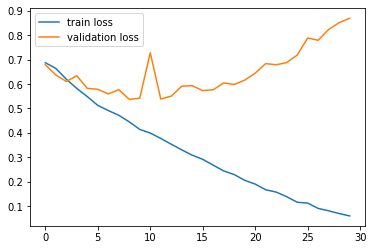

In [ ]:
plt.plot( hist.history['loss'], label='train loss')
plt.plot( hist.history['val_loss'], label='validation loss')
plt.legend()

### accuracy

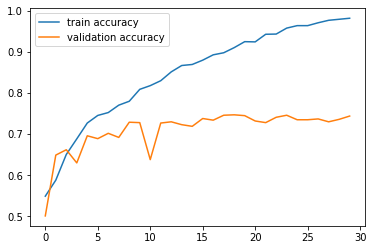

In [ ]:
plt.plot( hist.history['acc'], label='train accuracy')
plt.plot( hist.history['val_acc'], label='validation accuracy')
plt.legend()

# 데이터의 증식
- 하나의 이미지를 상, 하 반전, 좌, 우 반전, 등으로 여러가지 형태로 만들어 내는 것
- ImageDataGenerator
  - rotation_range: 회전
  - width_shift_range, height_shift_range: 그림을 수평과 수직으로 랜덤하게 평행 이동
  - zoom_range: 확대
  - horizontal_flip: 수형으로 뒤집습니다.

In [ ]:
from keras.preprocessing import image

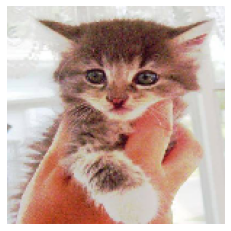

In [ ]:
fnames = [ os.path.join(train_cat_path, fname) for fname in os.listdir(train_cat_path) ]

# 이 중에서 하나의 이미지를 선택
img_path = fnames[100]

# 이미지를 읽고 크기를 150 x 150으로 변경
img = image.load_img( img_path, target_size=(150, 150) )

# 원본 이미지
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
dataGen = ImageDataGenerator(
  rotation_range = 40,
  width_shift_range= 0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode = 'nearest'
)

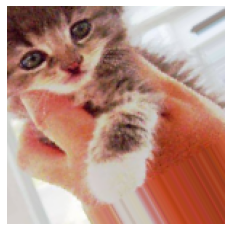

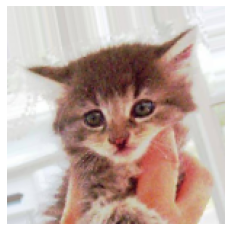

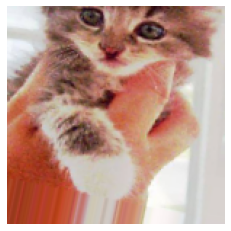

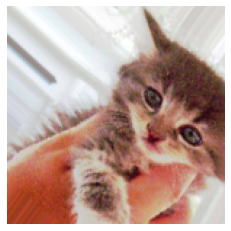

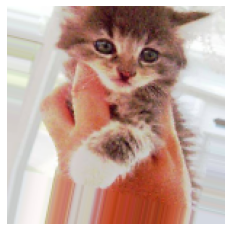

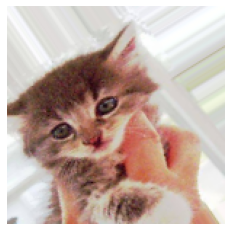

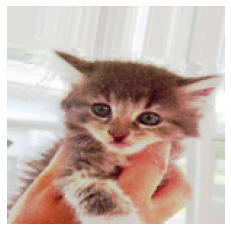

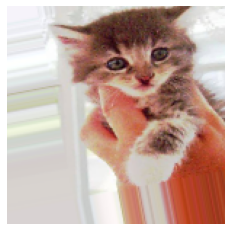

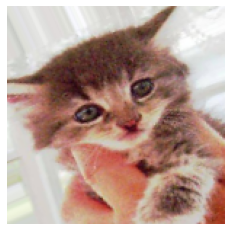

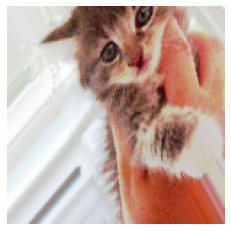

In [ ]:
# 150 x 150 x 3 크기의 넘파이 배열로 변환
x = image.img_to_array(img)

# 1 x 150 x 150 x 3 크기로 변환
x = x.reshape((1,) + x.shape)

i = 0
for batch in dataGen.flow(x, batch_size=1):
  plt.figure(i)
  plt.imshow(image.array_to_img(batch[0]))
  plt.axis('off')
  i += 1
  if i % 10 == 0: break
plt.show()

In [ ]:
base_dir = '/content/drive/MyDrive/멀티캠퍼스/data/cat_and_dog_small/'
train_path = os.path.join(base_dir, 'train')
val_path = os.path.join(base_dir, 'validation')
test_path = os.path.join(base_dir, 'test')

# 학습 이미지를 생성
train_datagen = ImageDataGenerator(
  rescale = 1./255,
  rotation_range = 40,
  width_shift_range= 0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
)

# 검증 이미지는 증식하지 않습니다.
# 검증 데이터는 학습 과정에서 절대로 사용되어선 안됩니다.
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
  train_path,
  target_size = (150, 150), # 150 x 150의 크기로 변환
  batch_size = 20,
  class_mode = 'binary'
)

val_generator = test_datagen.flow_from_directory(
  val_path,
  target_size = (150, 150), # 150 x 150의 크기로 변환
  batch_size = 20,
  class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## 네트워크 구성
- 원본 이미지가 너무 적게 있고, 증식된 데이터를 만들었기 때문에 상호 연관성이 매우 크다.
  - 그래서 완전히 과적합을 없애기에는 어렵다
  - 그렇기 때문에, DropOut을 함께 사용

In [ ]:
model = tf.keras.models.Sequential()

# Convolution Layer
model.add( tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add( tf.keras.layers.MaxPool2D((2,2)))

model.add( tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add( tf.keras.layers.MaxPool2D((2,2)))

model.add( tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add( tf.keras.layers.MaxPool2D((2,2)))

model.add( tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add( tf.keras.layers.MaxPool2D((2,2)))

# feature map -> input
model.add( tf.keras.layers.Flatten() )

# DropOut Layer
model.add( tf.keras.layers.Dropout(0.5) )

# Neural Network
model.add( tf.keras.layers.Dense(512, activation='relu') ) # hidden layer
model.add( tf.keras.layers.Dense(1, activation='sigmoid') )# output layer

# optimaze
model.compile(
  loss = 'binary_crossentropy',
  metrics = ['acc'],
  optimizer = tf.keras.optimizers.RMSprop(lr=0.0001)
)

In [ ]:
hist = model.fit_generator(
  train_generator,
  steps_per_epoch = 100,
  epochs = 100,
  validation_data = val_generator,
  validation_steps= 50
)

Epoch 1/100
100/100 [==============================] - 29s 282ms/step - loss: 0.6968 - acc: 0.4965 - val_loss: 0.6875 - val_acc: 0.5440
Epoch 2/100
100/100 [==============================] - 27s 274ms/step - loss: 0.6913 - acc: 0.5240 - val_loss: 0.6780 - val_acc: 0.5690
Epoch 3/100
100/100 [==============================] - 28s 283ms/step - loss: 0.6782 - acc: 0.5780 - val_loss: 0.6576 - val_acc: 0.6030
Epoch 4/100
100/100 [==============================] - 28s 277ms/step - loss: 0.6753 - acc: 0.5660 - val_loss: 0.6491 - val_acc: 0.6100
Epoch 5/100
100/100 [==============================] - 27s 274ms/step - loss: 0.6613 - acc: 0.5980 - val_loss: 0.6304 - val_acc: 0.6390
Epoch 6/100
100/100 [==============================] - 27s 273ms/step - loss: 0.6525 - acc: 0.6120 - val_loss: 0.6773 - val_acc: 0.5620
Epoch 7/100
100/100 [==============================] - 28s 279ms/step - loss: 0.6377 - acc: 0.6360 - val_loss: 0.6782 - val_acc: 0.5730
Epoch 8/100
100/100 [===========================

### loss

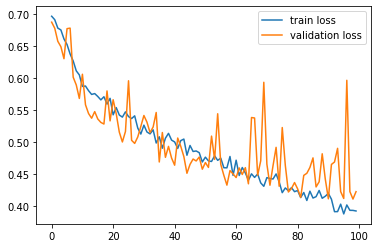

In [ ]:
plt.plot( hist.history['loss'], label='train loss')
plt.plot( hist.history['val_loss'], label='validation loss')
plt.legend()

### accuracy

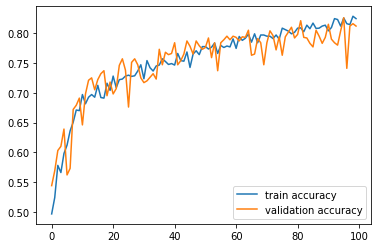

In [ ]:
plt.plot( hist.history['acc'], label='train accuracy')
plt.plot( hist.history['val_acc'], label='validation accuracy')
plt.legend()

# 전이학습
- 데이터의 셋이 적을 때 사용할 수 있는 방법
  - 기존에 학습된 레이어를 가져다가 사용하는 방법
  - 책에서는 사전 훈련된 컨브넷 이라고 설명

![](https://s3.amazonaws.com/book.keras.io/img/ch5/swapping_fc_classifier.png)

- 잘 알려진 이미지 넷
  - ResNet
  - VGG16
  - VGG19
  - MobileNet
  - ...

In [41]:
# 사전 훈련된 모델을 기반으로 해서 기본 모델을 생성
base_model = tf.keras.applications.VGG16(
  weights='imagenet',       # 모델 초기화를 위한 가중치 체크포인트
  include_top=False,        # NN 분류기를 포함할지 안할지를 결정
  input_shape=(150, 150, 3) # 네트워크에 들어갈 입력의 모양
)

58900480/58889256 [==============================] - 0s 0us/step


## VGG16

In [42]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

- VGG16과 같은 경우 150 x 150 x 3 이미지를 4 x 4 x 512의 특징맵으로 변환

## 첫 번째 방법
- Convoluion 레이어를 이용해서 특징 맵을 구하고, 구해진 특징맵을 따로 NN을 이용해서 분류
  - 특징맵 따로, NN 따로 구하겠다는 의미
- 속도도 빠르고 다 좋은데, 데이터 증식은 사용할 수 없다.

### 특징 추출

In [43]:
base_dir = '/content/drive/MyDrive/멀티캠퍼스/data/cat_and_dog_small/'
train_path = os.path.join(base_dir, 'train')
val_path = os.path.join(base_dir, 'validation')
test_path = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 20

In [44]:
def extract_features( dir, sample_count ):
  features = np.zeros( shape=(sample_count, 4, 4, 512) )
  labels = np.zeros( shape=(sample_count)) 
  generator = datagen.flow_from_directory(
    dir,
    target_size = (150, 150),
    batch_size = batch_size,
    class_mode = 'binary'
  )
  i = 0
  for input_batch, labels_batch in generator:
    features_batch = base_model.predict( input_batch )
    features[i * batch_size : (i + 1) * batch_size ] = features_batch
    labels[i * batch_size : (i + 1) * batch_size ] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      # 제너레이터는 무한히 값을 생성하기 때문에, 모든 이미지를 한 번씩 처리하고 나면 종료
      break
  return features, labels

In [45]:
train_features, train_labels = extract_features( train_path, 2000 )
val_features, val_labels = extract_features( val_path, 1000 )
test_features, test_labels = extract_features( test_path, 1000 )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


추출된 특성은 NN에 입력하기 위해서 1차원의 형태로 펼쳐줘야 합니다.

In [48]:
train_features = np.reshape( train_features, (2000, 4 * 4 * 512))
val_features = np.reshape( val_features, (1000, 4 * 4 * 512))
test_features = np.reshape( test_features, (1000, 4 * 4 * 512))

### 네트워크 정의

In [49]:
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Dense(256, activation='relu', input_dim = 4 * 4 * 512 ) ) 
model.add( tf.keras.layers.Dropout(0.5) )
model.add( tf.keras.layers.Dense(1, activation='sigmoid') )

# optimaze
model.compile(
  loss = 'binary_crossentropy',
  metrics = ['acc'],
  optimizer = tf.keras.optimizers.RMSprop(lr=0.0001)
)

In [50]:
hist = model.fit( 
  train_features, train_labels, epochs=30, batch_size = 20, 
  validation_data = (val_features, val_labels)
)

Epoch 1/30
100/100 [==============================] - 2s 11ms/step - loss: 0.4343 - acc: 0.7960 - val_loss: 0.2899 - val_acc: 0.8840
Epoch 2/30
100/100 [==============================] - 1s 10ms/step - loss: 0.2839 - acc: 0.8795 - val_loss: 0.2661 - val_acc: 0.8930
Epoch 3/30
100/100 [==============================] - 1s 11ms/step - loss: 0.2382 - acc: 0.9030 - val_loss: 0.2418 - val_acc: 0.9050
Epoch 4/30
100/100 [==============================] - 1s 10ms/step - loss: 0.2052 - acc: 0.9180 - val_loss: 0.2410 - val_acc: 0.8980
Epoch 5/30
100/100 [==============================] - 1s 10ms/step - loss: 0.1737 - acc: 0.9290 - val_loss: 0.2360 - val_acc: 0.8980
Epoch 6/30
100/100 [==============================] - 1s 11ms/step - loss: 0.1558 - acc: 0.9440 - val_loss: 0.2360 - val_acc: 0.9000
Epoch 7/30
100/100 [==============================] - 1s 9ms/step - loss: 0.1332 - acc: 0.9495 - val_loss: 0.2553 - val_acc: 0.9040
Epoch 8/30
100/100 [==============================] - 1s 10ms/step - l

### loss

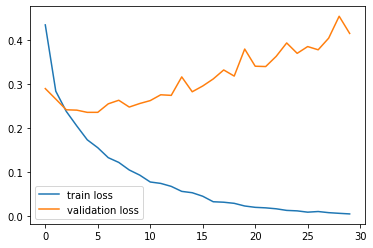

In [51]:
plt.plot( hist.history['loss'], label='train loss')
plt.plot( hist.history['val_loss'], label='validation loss')
plt.legend()

### accuracy

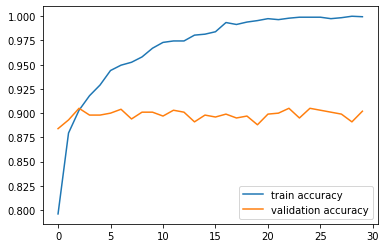

In [52]:
plt.plot( hist.history['acc'], label='train accuracy')
plt.plot( hist.history['val_acc'], label='validation accuracy')
plt.legend()